# Time Series Analysis

## Housing Prices

### Lynn Anderson

# Overview

The aim of this project was to use Time Series forecasting to predict which zip codes in San Jose, CA are most likely to provide the highest return on investment in the next 5 years. TS models are .........




# Business Understanding


Bay Area Properties Group is a Real Estate investment company looking to invest in the San Jose area. Many tech start ups are based in this location, and there is lkely to be a demand for property in the future.  

# Data Understanding

The dataset consisted of a csv file obtained from Zillow. The original dataset consisted of records from 342535353 zip codes across all 50 states, and covered 1996-201????. The data used in this project only looked at zip codes in the San Jose metro area. Additionally, to minimize the effects of the 2008 crash, data from 2012 onwards was used for modeling.



# Data Preparation

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

%matplotlib inline

In [2]:
df = pd.read_csv("data/zillow_data.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [58]:
df["State"].value_counts()

CA    1224
NY    1015
TX     989
PA     831
FL     785
OH     588
IL     547
NJ     502
MI     499
IN     428
NC     428
MA     417
TN     404
VA     401
MN     375
GA     345
WA     341
WI     332
MO     319
MD     317
CO     249
KS     241
AZ     230
OR     224
OK     221
SC     206
NH     199
LA     193
AL     183
IA     158
MS     153
KY     139
CT     124
UT     121
ID     110
AR     105
NV     103
ME      86
NE      83
WV      72
MT      71
HI      62
NM      60
RI      59
DE      41
ND      31
WY      31
AK      28
SD      19
DC      18
VT      16
Name: State, dtype: int64

In [3]:
ca = df.loc[df['State'] == 'CA']
ca.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500
15,96107,90250,Hawthorne,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,16,152500.0,152600.0,152600.0,...,579300,585700,590900,594700,598500,601300,602800,606100,612400,616200
27,97771,94565,Pittsburg,CA,San Francisco,Contra Costa,28,139200.0,138300.0,137500.0,...,394900,398400,401600,405400,408600,410900,413700,417900,424300,430100
30,96027,90046,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,31,340600.0,341700.0,343000.0,...,1839800,1861100,1888600,1903900,1907500,1922100,1952400,1974500,1975900,1966900
64,97711,94501,Alameda,CA,San Francisco,Alameda,65,222400.0,222300.0,222400.0,...,965100,975000,987800,1000000,1009900,1021000,1032400,1042000,1053000,1059700


In [4]:
ca['Metro'].value_counts()

Los Angeles-Long Beach-Anaheim    347
San Francisco                     134
Riverside                         116
Sacramento                         92
San Diego                          87
San Jose                           55
Fresno                             40
Bakersfield                        27
Santa Rosa                         25
Stockton                           25
Ventura                            23
Modesto                            19
Visalia                            19
Santa Maria-Santa Barbara          18
San Luis Obispo                    18
Salinas                            16
Santa Cruz                         12
Chico                              12
Vallejo                            11
Eureka                             11
Merced                             10
Madera                              9
Truckee                             8
Redding                             8
Yuba City                           8
Clearlake                           8
Napa        

In [5]:
ca['CountyName'].value_counts()

Los Angeles        264
San Diego           87
Orange              83
Riverside           60
San Bernardino      56
Santa Clara         52
Sacramento          46
Alameda             43
Fresno              40
Contra Costa        31
Kern                27
San Mateo           25
Sonoma              25
San Joaquin         25
Ventura             23
Placer              22
Stanislaus          19
San Francisco       19
Tulare              19
San Luis Obispo     18
Santa Barbara       18
El Dorado           16
Marin               16
Monterey            16
Santa Cruz          12
Butte               12
Solano              11
Humboldt            11
Merced              10
Madera               9
Yolo                 8
Shasta               8
Amador               8
Siskiyou             8
Lake                 8
Calaveras            8
Nevada               8
Napa                 7
Mendocino            6
Plumas               6
Imperial             5
Yuba                 4
Sutter               4
Kings      

In [6]:
san_jose = ca.loc[(ca['Metro'] == 'San Jose')] #| (ca['Metro'] == 'San Francisco')]
san_jose

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
244,97991,95123,San Jose,CA,San Jose,Santa Clara,245,224500.0,224800.0,225200.0,...,879400,894700,911900,931300,951900,970700,986100,1002200,1025400,1043900
289,97952,95051,Santa Clara,CA,San Jose,Santa Clara,290,258700.0,259300.0,259900.0,...,1252800,1287100,1326800,1365400,1405600,1444500,1476800,1508100,1547700,1577100
363,97940,95035,Milpitas,CA,San Jose,Santa Clara,364,231100.0,232100.0,233100.0,...,970900,982600,1000200,1021900,1045000,1063700,1076600,1096500,1131900,1160700
461,97926,95014,Cupertino,CA,San Jose,Santa Clara,462,432400.0,434500.0,436700.0,...,2099800,2135500,2181900,2235300,2291500,2336900,2374400,2416300,2464200,2490200
513,97980,95112,San Jose,CA,San Jose,Santa Clara,514,186800.0,186800.0,186700.0,...,738000,754200,772700,791600,812500,834100,852200,871200,896300,916100
516,97549,94087,Sunnyvale,CA,San Jose,Santa Clara,517,361300.0,363300.0,365300.0,...,1856300,1888500,1931600,1982300,2039400,2092900,2135200,2177400,2234000,2276300
536,97993,95125,San Jose,CA,San Jose,Santa Clara,537,286000.0,287700.0,289600.0,...,1255400,1273600,1296800,1324600,1355000,1380100,1399800,1422600,1451000,1468100
582,97548,94086,Sunnyvale,CA,San Jose,Santa Clara,583,310400.0,312000.0,313800.0,...,1559300,1601000,1646500,1695300,1744100,1782000,1811300,1846200,1893700,1926800
656,97920,95008,Campbell,CA,San Jose,Santa Clara,657,262100.0,263000.0,264000.0,...,1254500,1280700,1313600,1351000,1389200,1421000,1445700,1474600,1512900,1539900
851,97931,95020,Gilroy,CA,San Jose,Santa Clara,852,238000.0,238500.0,239000.0,...,708300,716300,727900,741500,754500,764900,772200,781700,794600,802800


In [7]:
san_jose['CountyName'].value_counts()

Santa Clara    52
San Benito      3
Name: CountyName, dtype: int64

In [8]:
san_jose['RegionName'].value_counts()

95123    1
94022    1
95148    1
95118    1
95032    1
95117    1
95121    1
95131    1
95133    1
95054    1
94089    1
94024    1
94301    1
95135    1
94306    1
94041    1
95110    1
95138    1
95030    1
95130    1
94305    1
95033    1
95119    1
95046    1
95139    1
95045    1
95132    1
95070    1
95051    1
95127    1
95035    1
95014    1
95112    1
94087    1
95125    1
94086    1
95008    1
95020    1
95124    1
95037    1
95136    1
95111    1
95122    1
95023    1
94040    1
95050    1
95126    1
94303    1
95129    1
95128    1
95134    1
94043    1
95116    1
95120    1
95004    1
Name: RegionName, dtype: int64

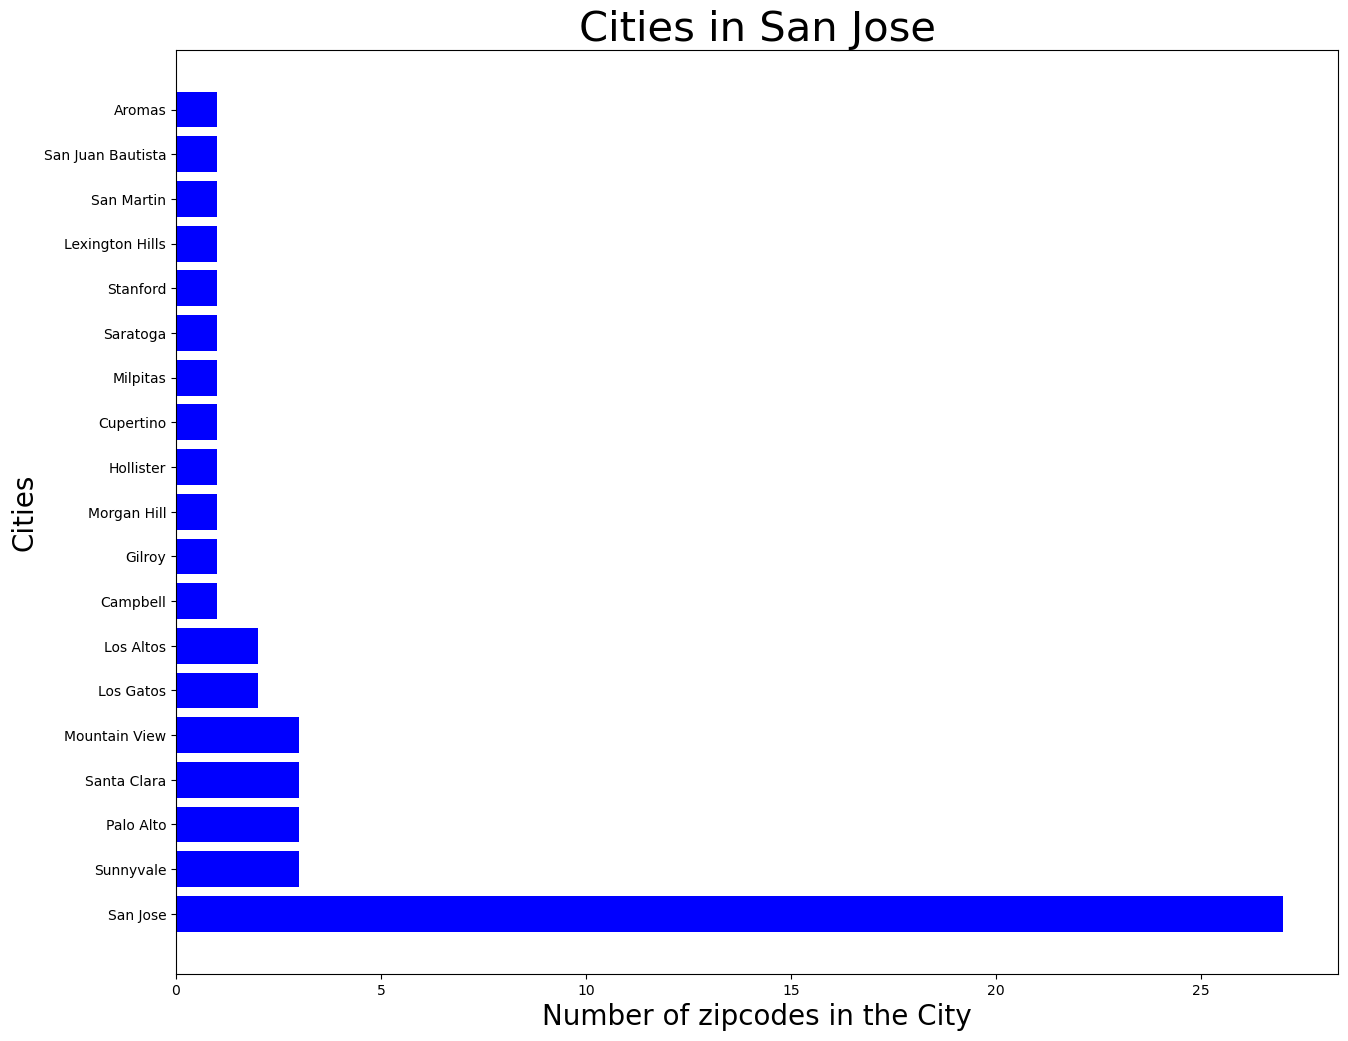

In [9]:
#Visualizing the number of zipcodes in each city in the Bay Area

fig, ax = plt.subplots(figsize=(15,12))

y = [a for a in san_jose['City'].value_counts()]

x = [a for a in san_jose['City'].value_counts().keys()]

ax.barh(x,y,color='blue')
ax.set_title('Cities in San Jose',fontsize=30)
ax.set_ylabel('Cities',fontsize=20)
ax.set_xlabel('Number of zipcodes in the City',fontsize=20);

In [10]:
san_jose_roi = san_jose.copy()
san_jose_roi['roi_since12'] = None
#bay_area_roi['roi_since11'] = bay_area_roi['2018-04'].apply(lambda x : ((x - bay_area_roi['2011-01'])/(bay_area_roi['2011-01'])))
san_jose_roi['roi_since12'] = (san_jose_roi['2018-04'] - san_jose_roi['2012-01'])/(san_jose_roi['2012-01'])
san_jose_roi = san_jose_roi.sort_values('roi_since12',ascending=False)
san_jose_roi.head()




,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,roi_since12
5328,97551,94089,Sunnyvale,CA,San Jose,Santa Clara,5329,206600.0,207600.0,208600.0,...,1005100,1030600,1060800,1090100,1113200,1130100,1149300,1180300,1206600,2.032420
2580,97530,94043,Mountain View,CA,San Jose,Santa Clara,2581,291700.0,294000.0,296400.0,...,1745300,1779800,1812000,1847800,1881900,1915700,1965600,2031800,2074900,1.759542
582,97548,94086,Sunnyvale,CA,San Jose,Santa Clara,583,310400.0,312000.0,313800.0,...,1601000,1646500,1695300,1744100,1782000,1811300,1846200,1893700,1926800,1.646340
513,97980,95112,San Jose,CA,San Jose,Santa Clara,514,186800.0,186800.0,186700.0,...,754200,772700,791600,812500,834100,852200,871200,896300,916100,1.643867
1791,97527,94040,Mountain View,CA,San Jose,Santa Clara,1792,413200.0,416100.0,419200.0,...,2418700,2478700,2541700,2609400,2669000,2718200,2770500,2820300,2839500,1.632091


C:\Users\lalyn\AppData\Local\Temp\ipykernel_13112\2507409957.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 90)


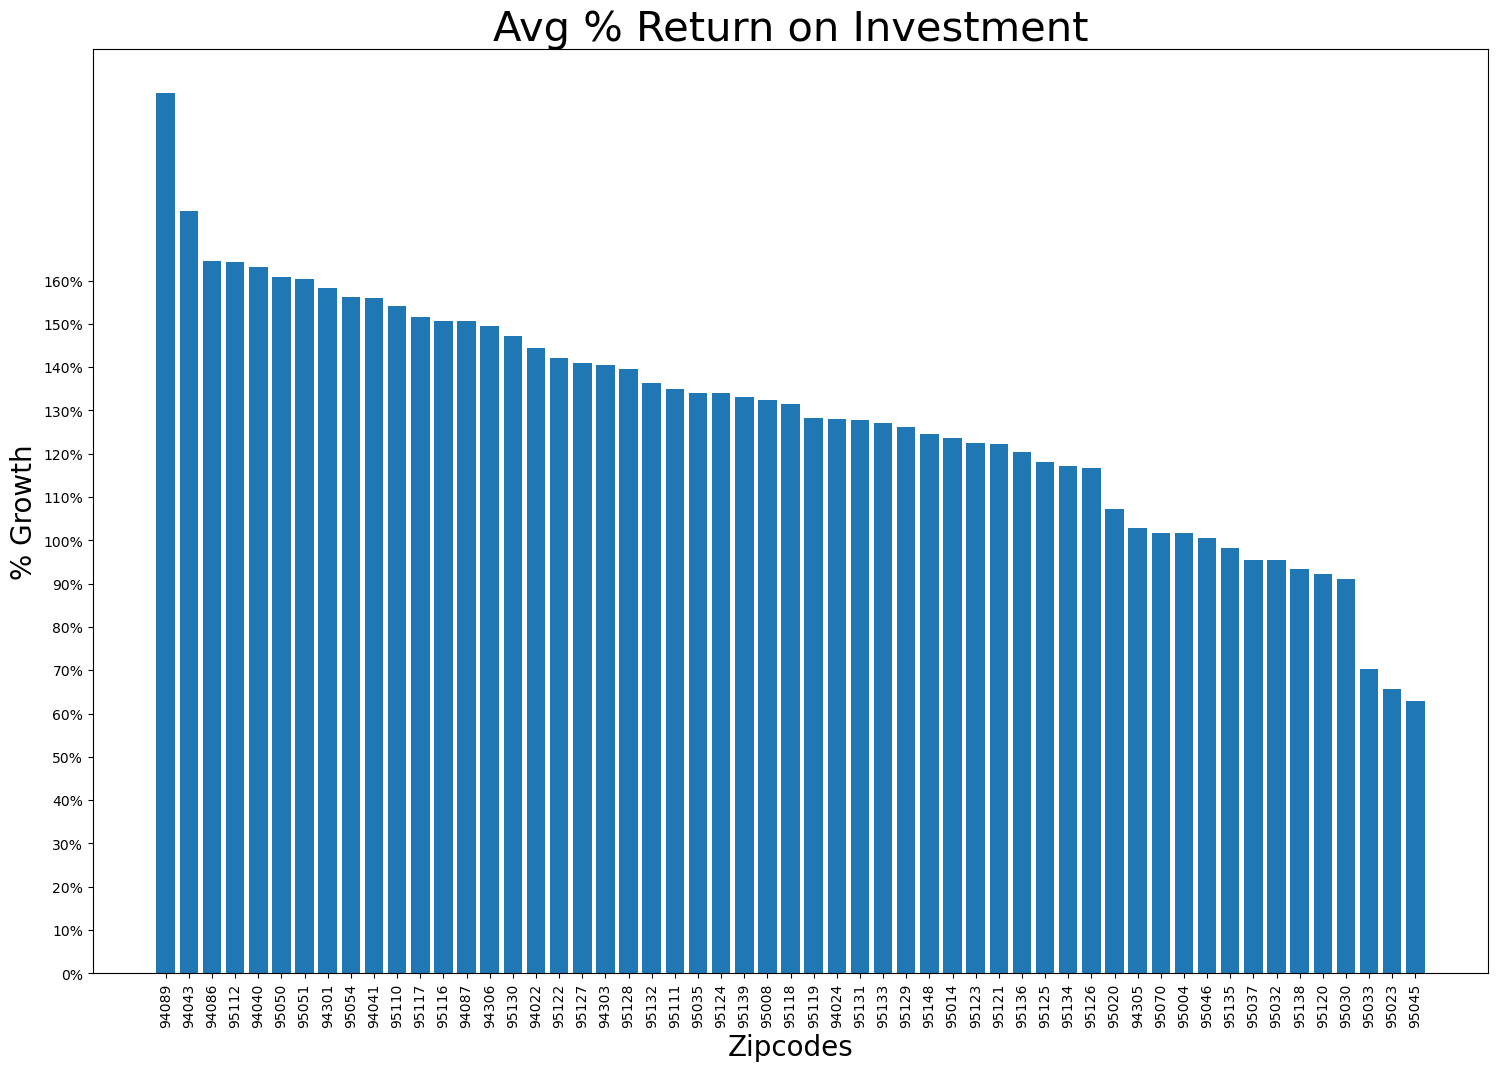

In [11]:
fig,ax=plt.subplots(figsize=(18,12))

#x_labels = bay_area_roi['RegionName']
x_labels = [str(a) for a in san_jose_roi['RegionName']]
x = [str(a) for a in san_jose_roi['RegionName']]
y = [a for a in san_jose_roi['roi_since12']]

ax.bar(x,y)

#ax.set_xticks(a for a in bay_area_roi['RegionName'].keys())
ax.set_xticklabels(x_labels, rotation = 90)
ax.set_yticks([a/10 for a in list(range(0,17,1))])
ax.set_yticklabels([str(a*10)+'%' for a in list(range(0,17,1))])
ax.set_ylabel('% Growth',fontsize='20')
ax.set_xlabel('Zipcodes',fontsize='20')
ax.set_title('Avg % Return on Investment',fontsize='30');

In [12]:
san_jose.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 244 to 11894
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 117.3+ KB


In [13]:
san_jose.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,97889.363636,94883.690909,3985.963636,320265.454545,321758.181818,323323.636364,324978.181818,326727.272727,328623.636364,330785.454545,...,1.404762e+06,1.427949e+06,1.457556e+06,1.491533e+06,1.527425e+06,1.557516e+06,1.580244e+06,1.605442e+06,1.638996e+06,1.661938e+06
std,167.437812,404.039505,3145.595309,149900.075628,150969.707154,152103.186179,153321.690006,154616.096204,156019.801644,157593.581156,...,8.368477e+05,8.488072e+05,8.646938e+05,8.830873e+05,9.025693e+05,9.175322e+05,9.284382e+05,9.406087e+05,9.556123e+05,9.639275e+05
min,97513.000000,94022.000000,245.000000,170600.000000,170700.000000,170900.000000,171000.000000,171200.000000,171500.000000,172000.000000,...,5.066000e+05,5.043000e+05,5.012000e+05,4.996000e+05,4.986000e+05,4.994000e+05,5.010000e+05,5.026000e+05,5.056000e+05,5.096000e+05
25%,97923.000000,95011.000000,1686.500000,233350.000000,234300.000000,235100.000000,235750.000000,236550.000000,237500.000000,238750.000000,...,8.941000e+05,9.091500e+05,9.266000e+05,9.478000e+05,9.691000e+05,9.874000e+05,1.001050e+06,1.015600e+06,1.032200e+06,1.045750e+06
50%,97966.000000,95070.000000,3209.000000,254700.000000,256600.000000,258500.000000,260500.000000,262600.000000,264800.000000,267200.000000,...,1.071400e+06,1.094000e+06,1.120800e+06,1.153000e+06,1.191900e+06,1.231900e+06,1.261600e+06,1.291700e+06,1.335300e+06,1.368000e+06
75%,97993.500000,95125.500000,5791.500000,368500.000000,369800.000000,371150.000000,372500.000000,373850.000000,375250.000000,376800.000000,...,1.716750e+06,1.751900e+06,1.791600e+06,1.835050e+06,1.881350e+06,1.920900e+06,1.953350e+06,1.994600e+06,2.052250e+06,2.092800e+06
max,98011.000000,95148.000000,11895.000000,795600.000000,798400.000000,801700.000000,805400.000000,809600.000000,814400.000000,820200.000000,...,4.188300e+06,4.247600e+06,4.319300e+06,4.401100e+06,4.481700e+06,4.544700e+06,4.595100e+06,4.668700e+06,4.762600e+06,4.818400e+06


In [14]:
san_jose.isnull().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

In [15]:
san_jose['RegionName'].nunique()

55

In [16]:
san_jose['City'].nunique()

19

In [17]:
san_jose['Metro'].nunique()

1

def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

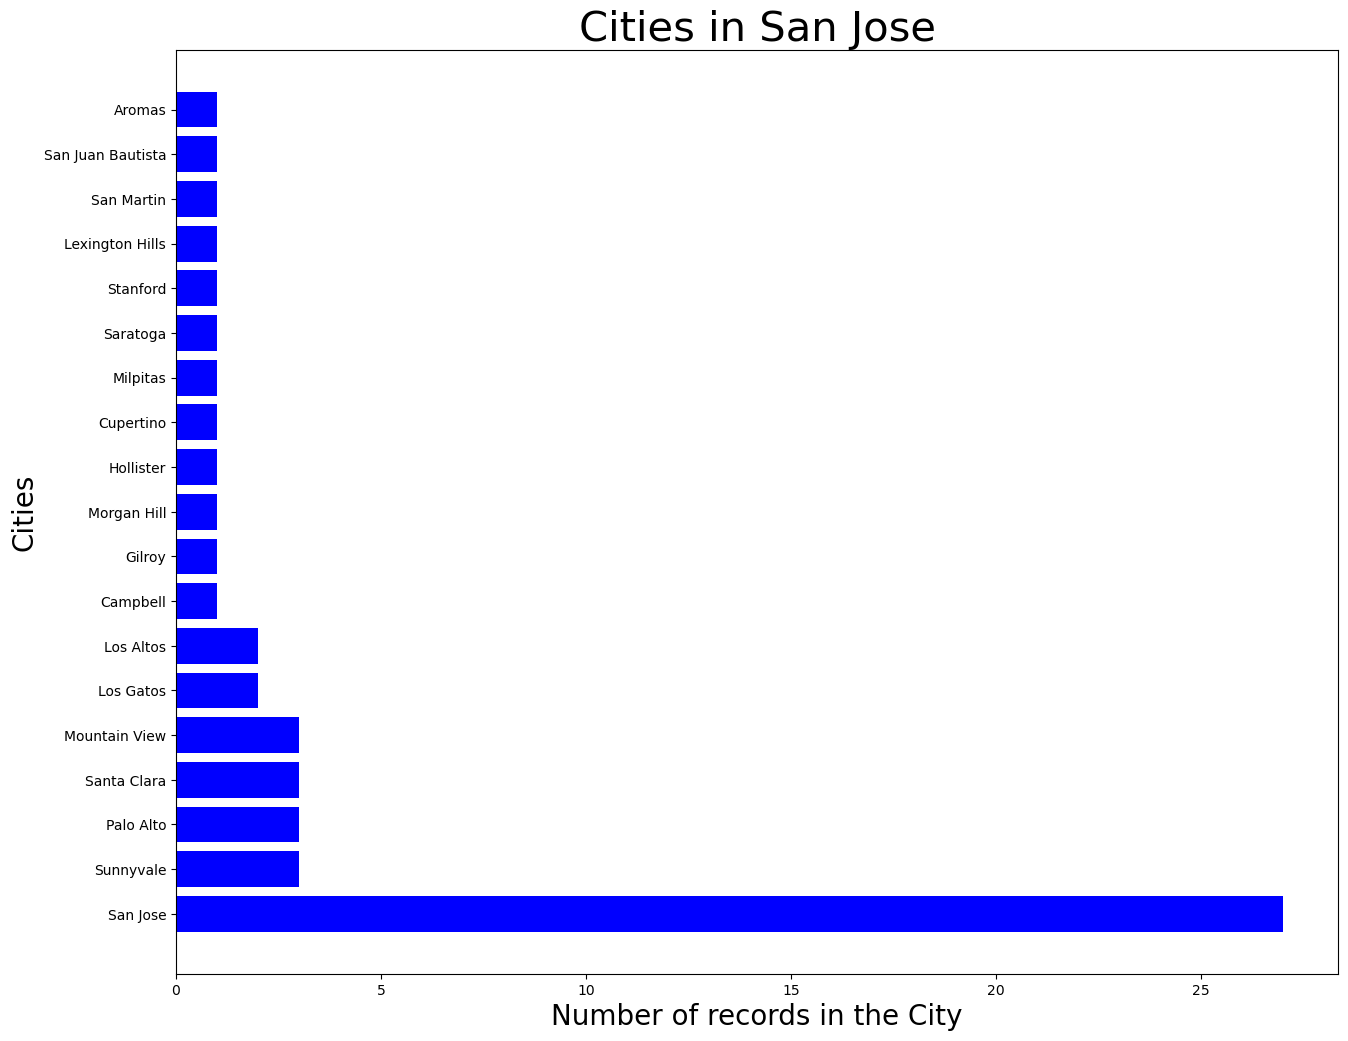

In [18]:
#Visualizing the value counts of zipcodes in each city in the Miami-Dade county

fig, ax = plt.subplots(figsize=(15,12))

y = [a for a in san_jose['City'].value_counts()]

x = [a for a in san_jose['City'].value_counts().keys()]

ax.barh(x,y,color='blue')
ax.set_title('Cities in San Jose',fontsize=30)
ax.set_ylabel('Cities',fontsize=20)
ax.set_xlabel('Number of records in the City',fontsize=20);

# Data Visualization

In [19]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

NameError: name 'matplotlib' is not defined

### Reshape wide to long

In [20]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [48]:
#long_df = melt_data(bay_area)
#long_df.head()

,value
time,
1996-04-01,303238.28125
1996-05-01,303475.78125
1996-06-01,303821.87500
1996-07-01,304275.78125
1996-08-01,304871.87500


In [22]:
#Dataframe containining historical prices of the Zip Code.

zip94089 = df[df['RegionName']==94089]
# Time Series dataframe of Zip Code prices

series94089 = melt_data(zip94089)
#Observing our Time Series dataframe

series94089

,value
time,
1996-04-01,206600.0
1996-05-01,207600.0
1996-06-01,208600.0
1996-07-01,209600.0
1996-08-01,210600.0
...,...
2017-12-01,1113200.0
2018-01-01,1130100.0
2018-02-01,1149300.0


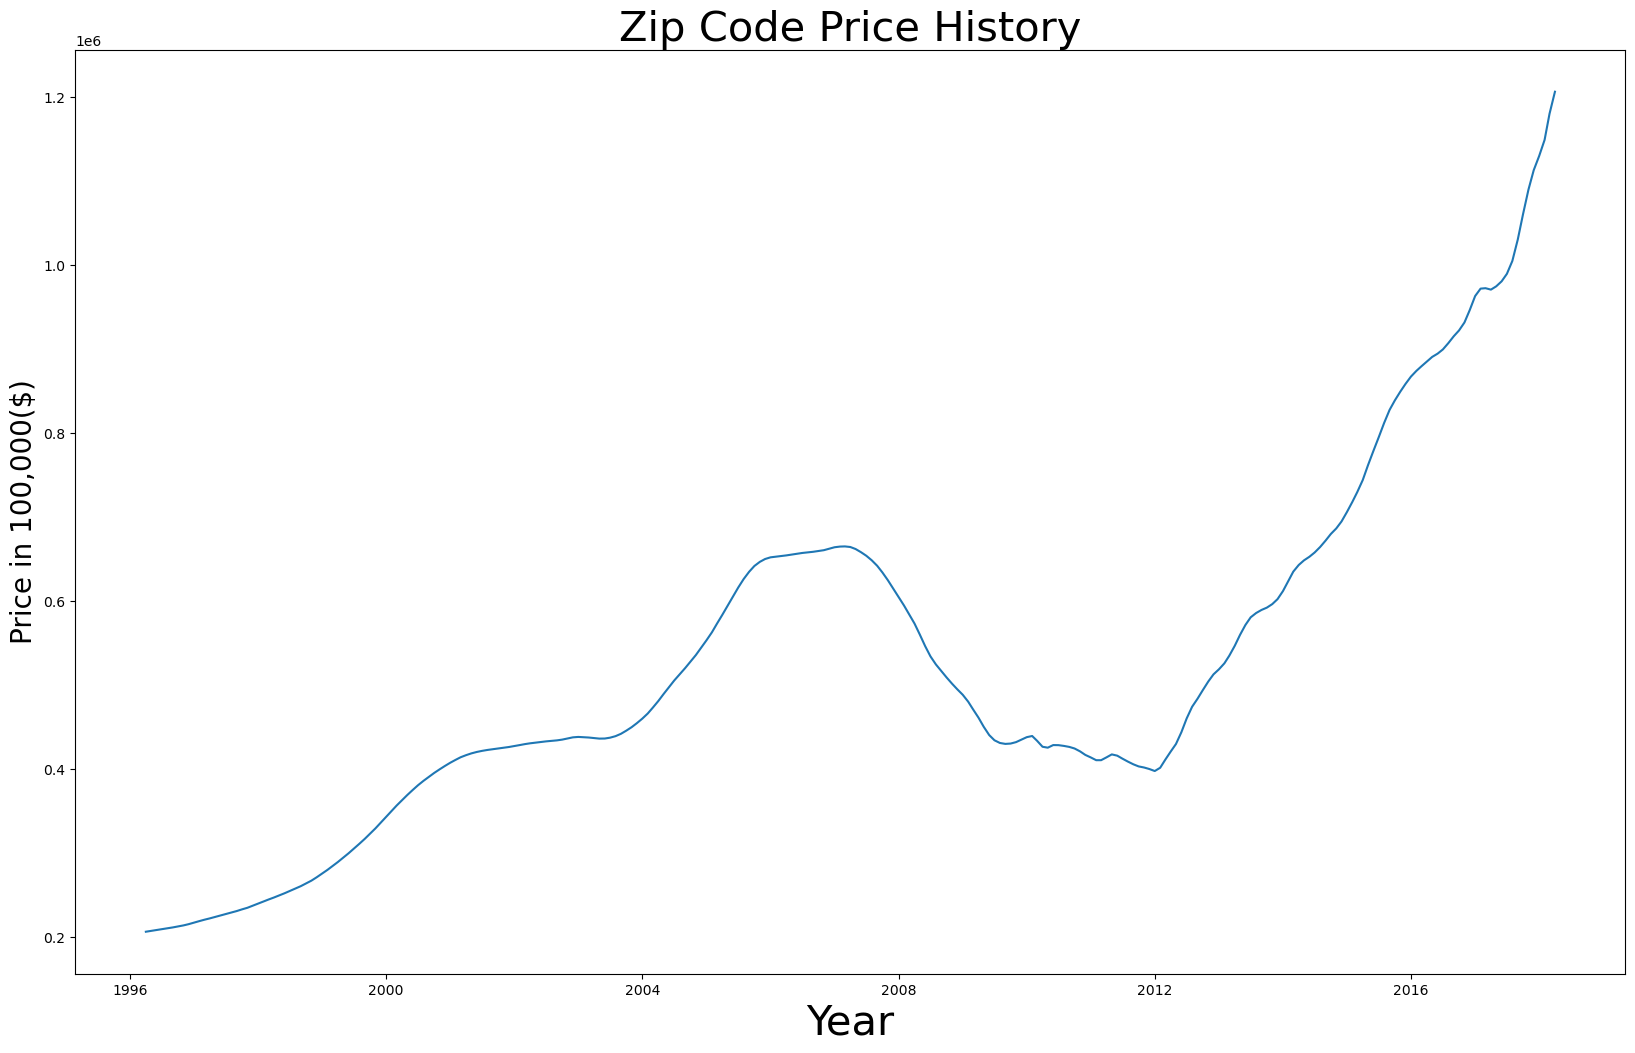

In [23]:
#Visualizing our Time Series Data for zipcode- 33126

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(series94089)

ax.set_xlabel('Year', fontsize=30)
ax.set_ylabel('Price in 100,000($)',fontsize=20)
ax.set_title('Zip Code Price History',fontsize=30);

In [52]:
series94089.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', name='time', length=265, freq=None)

In [24]:
series94089.isnull().sum()

value    0
dtype: int64

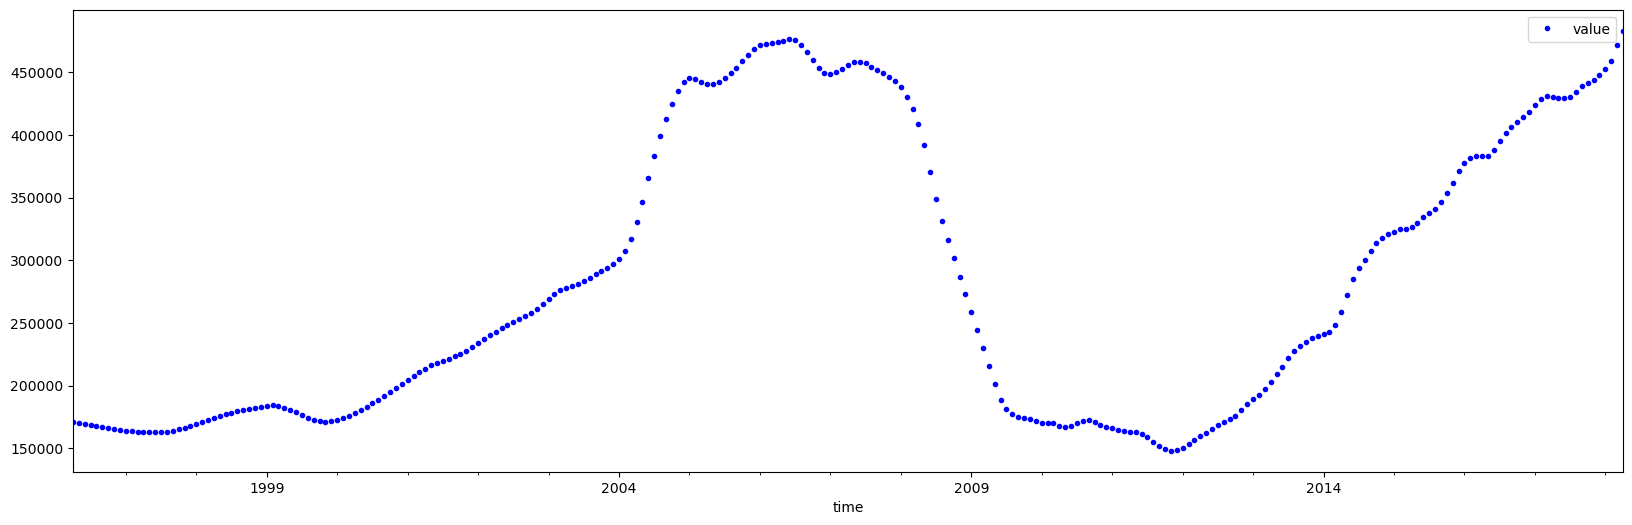

In [55]:
series94089.plot(figsize = (20,6), style = '.b');


In [26]:
year_groups = series94089.groupby(pd.Grouper(freq ='A'))
# Create a new DataFrame and store yearly values in columns 
df_annual = pd.DataFrame()

for yr, group in year_groups:
    df_annual[yr.year] = group.values.ravel()
    
# Plot the yearly groups as subplots
df_annual.plot(figsize = (13,8), subplots=True, legend=True);

ValueError: Length of values (12) does not match length of index (9)

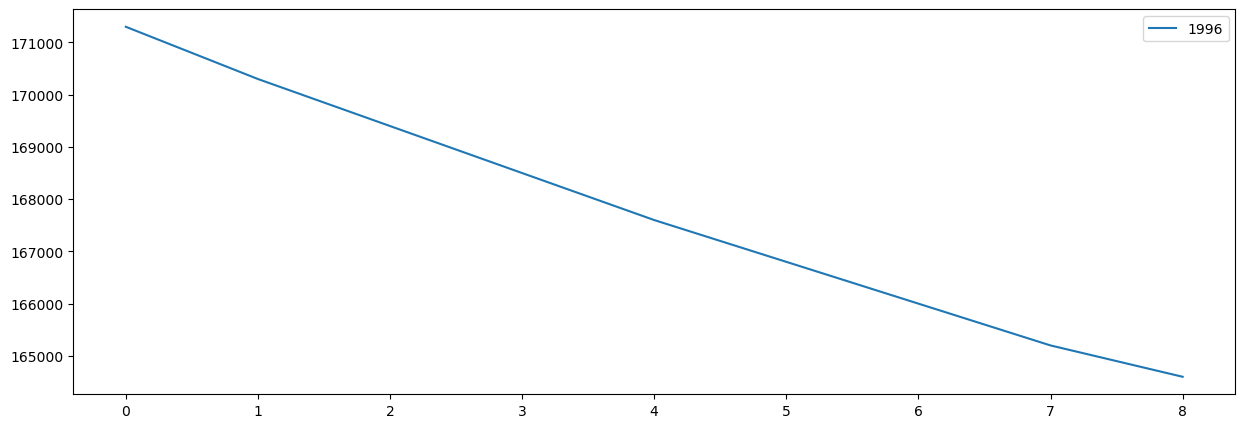

In [57]:
df_annual.plot(figsize = (15,5), subplots=False, legend=True);


### Histogram

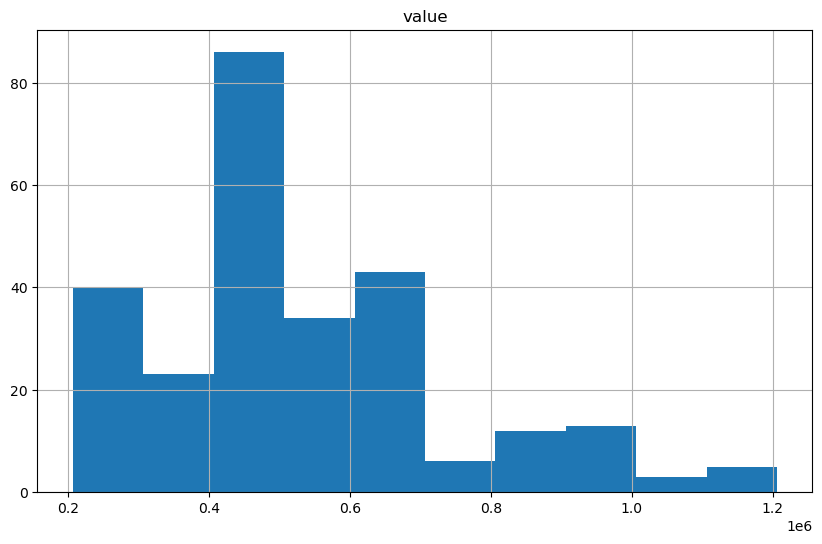

In [27]:
series94089.hist(figsize = (10,6));


### Boxplot

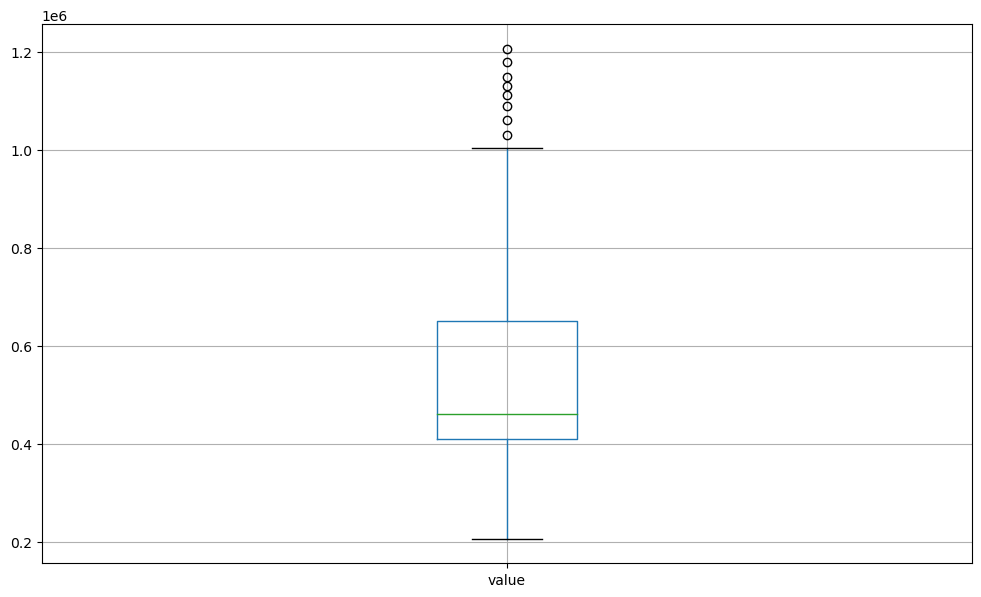

In [28]:
series94089.boxplot(figsize = (12,7));


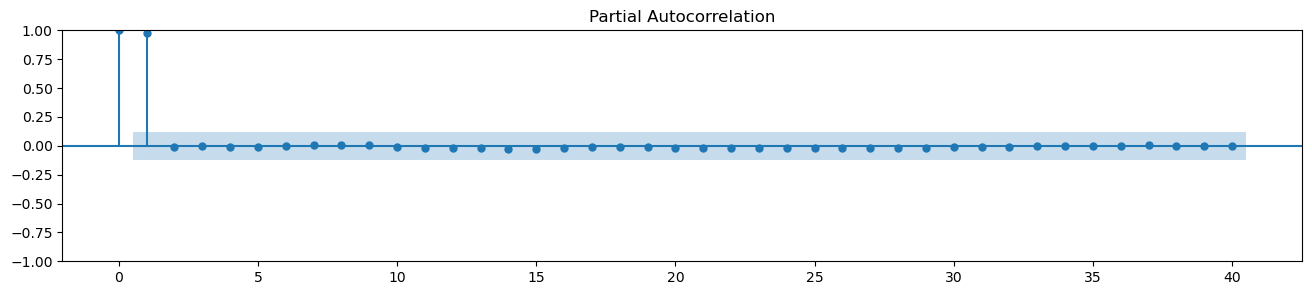

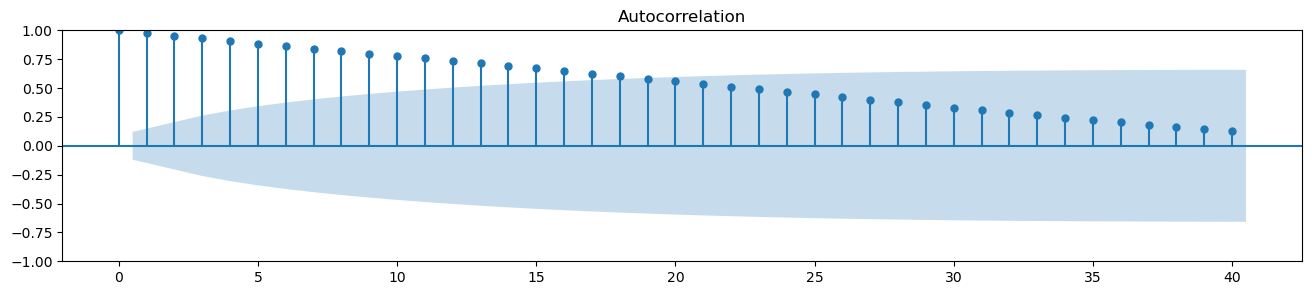

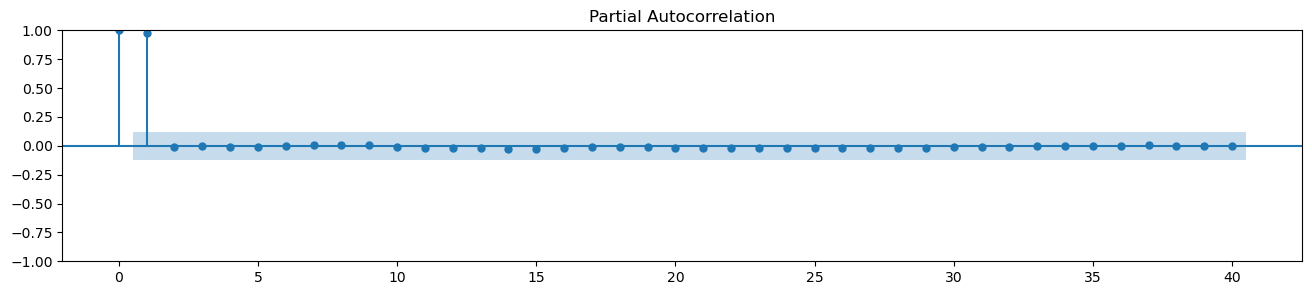

In [29]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(series94089, ax=ax, lags=40)

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series94089, ax=ax, lags=40, method="ywm")

## Trends?

'for zc in sj_zips:\n    TS = melt_data(zc)\n    plt.plot(TS[2012:])'

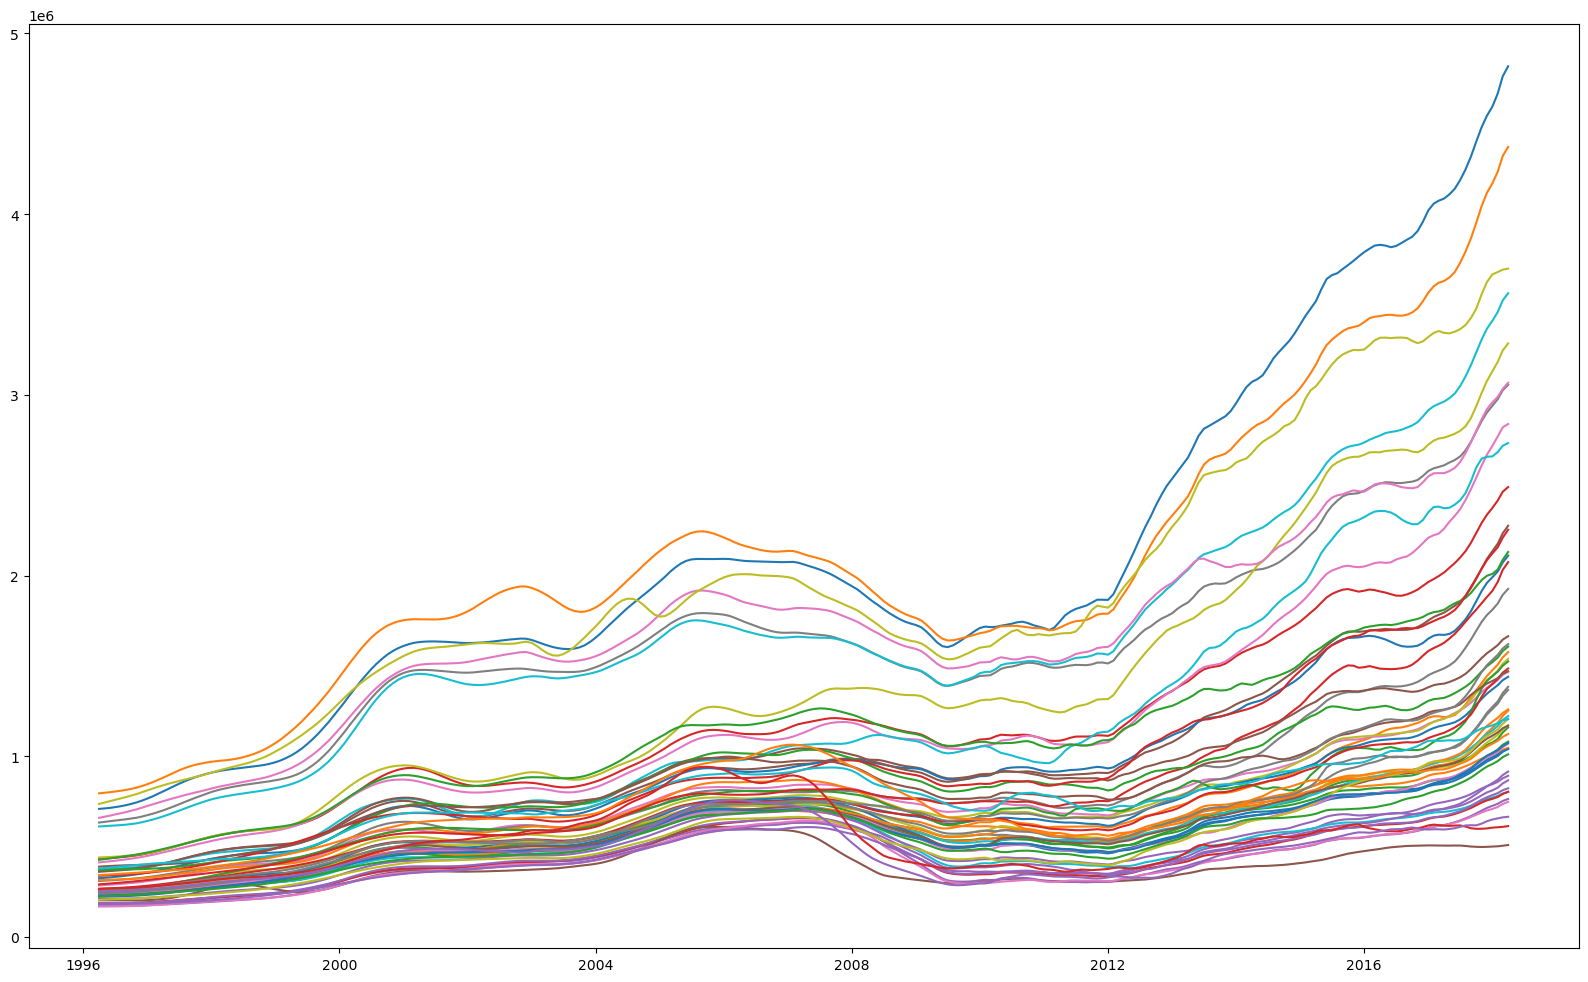

In [75]:
zip_dict = {}

for zipcode in sj_zips:
    zip_dict[zipcode] = melt_data(san_jose[san_jose['RegionName']==zipcode])
    
fig,ax = plt.subplots(figsize=(20,12))

for zipcode in zip_dict:
    ax.plot(zip_dict[zipcode]);
"""for zc in sj_zips:
    TS = melt_data(zc)
    plt.plot(TS[2012:])"""

In [78]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=4, center=False).mean()
    roll_std = TS.rolling(window=4, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['value'])
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(8,5))
    plt.plot(TS, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return dftest[1] < 0.05

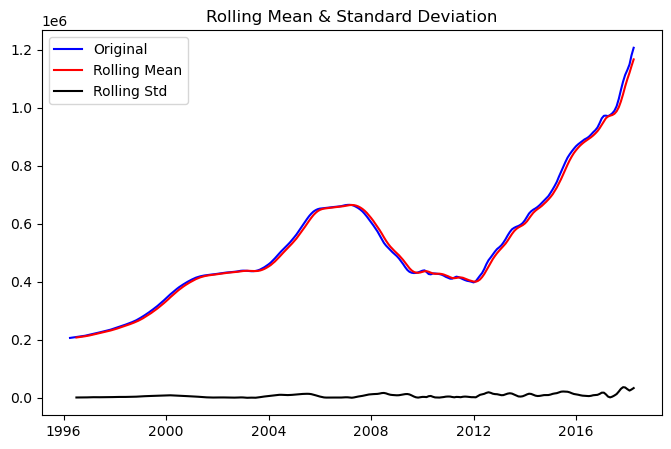

Results of Dickey-Fuller Test: 

Test Statistic                   0.412844
p-value                          0.981969
#Lags Used                      14.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


False

In [79]:
stationarity_check(series94089)

### Slice series for recent data

In [35]:
recent_ts = series94089['2012':]


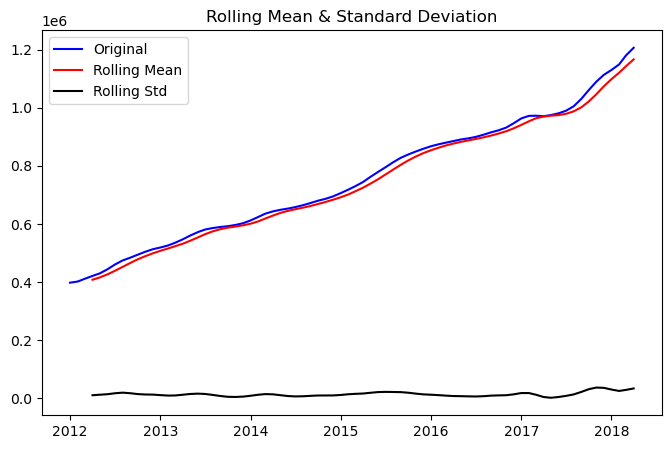

Results of Dickey-Fuller Test: 

Test Statistic                  1.443749
p-value                         0.997304
#Lags Used                     10.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


False

In [80]:
stationarity_check(recent_ts)

### Log of recent data

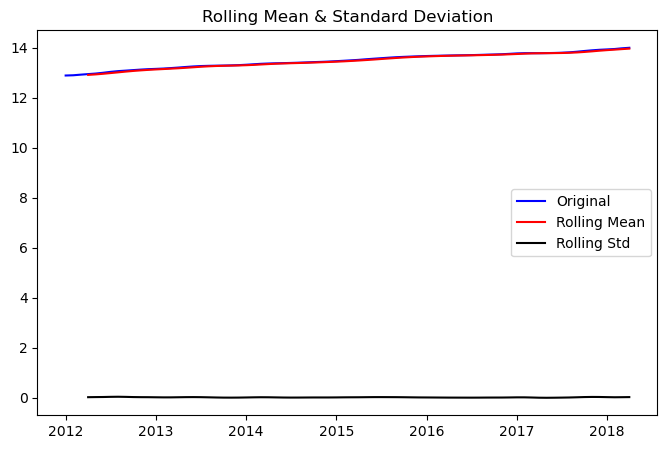

Results of Dickey-Fuller Test: 

Test Statistic                 -0.352200
p-value                         0.917779
#Lags Used                      6.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


False

In [81]:
recent_log_ts = np.log(recent_ts)
stationarity_check(recent_log_ts)

### Differencing

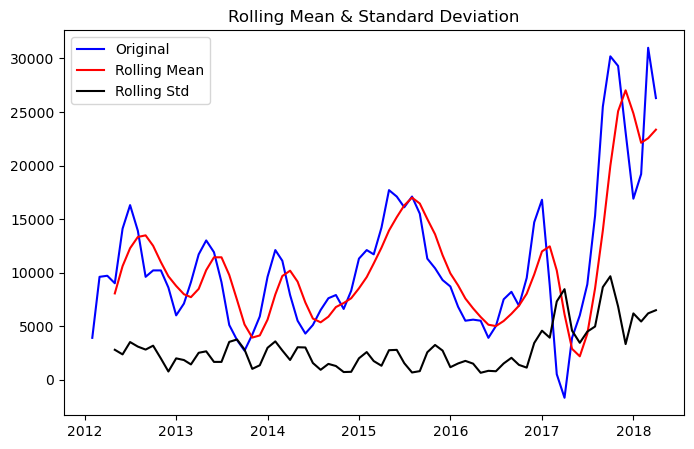

Results of Dickey-Fuller Test: 

Test Statistic                 -2.088850
p-value                         0.249022
#Lags Used                      9.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


False

In [84]:
recent_diff = recent_ts.diff().dropna()

stationarity_check(recent_diff)

### Subtract rolling mean

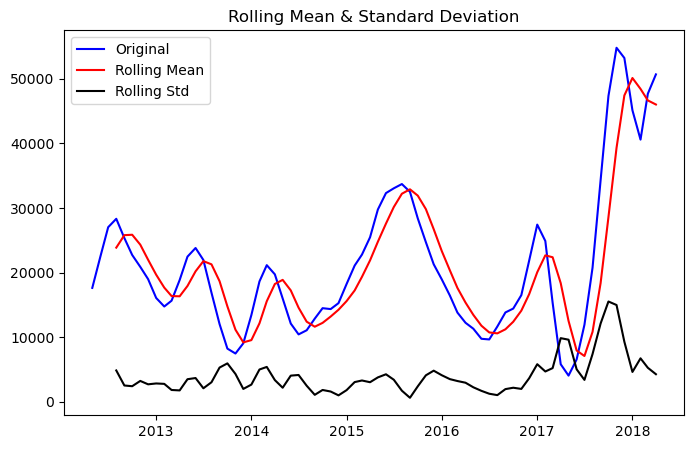

Results of Dickey-Fuller Test: 

Test Statistic                 -2.469161
p-value                         0.123159
#Lags Used                      8.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


False

In [82]:
recent_roll_mean = recent_ts.rolling(window=5, center=False).mean()
recent_ts_rm = recent_ts - recent_roll_mean
stationarity_check(recent_ts_rm.dropna())

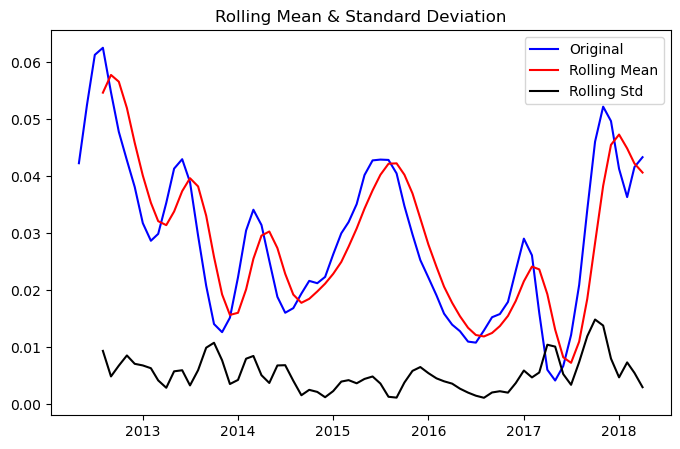

Results of Dickey-Fuller Test: 

Test Statistic                 -3.463667
p-value                         0.008971
#Lags Used                      3.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


True

In [83]:
recent_log_roll_mean = recent_log_ts.rolling(window=5, center=False).mean()
recent_log_ts_rm = recent_log_ts - recent_log_roll_mean
stationarity_check(recent_log_ts_rm.dropna())

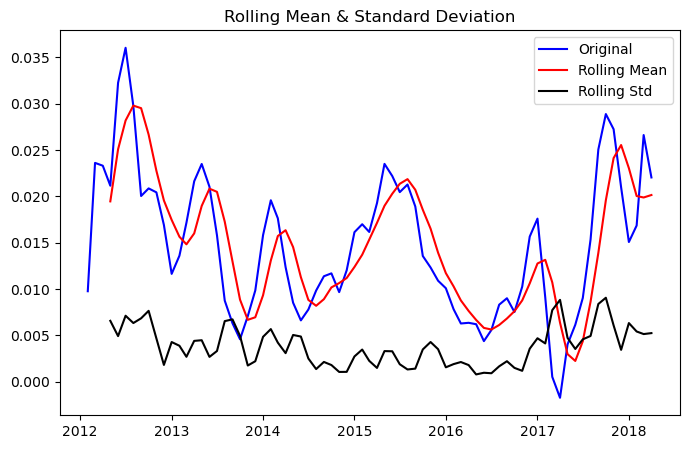

Results of Dickey-Fuller Test: 

Test Statistic                 -3.633308
p-value                         0.005155
#Lags Used                      3.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


True

In [85]:
recent_log_diff = recent_log_ts.diff().dropna()

stationarity_check(recent_log_diff)

### Train-test split

In [ ]:
chicago_df_defl_train = chicago_df_defl.loc['2012-06':'2017-10',:] # 5 years 4 months for train data
chicago_df_defl_test = chicago_df_defl.loc['2017-11':'2018-04',:] # 6 months for test data

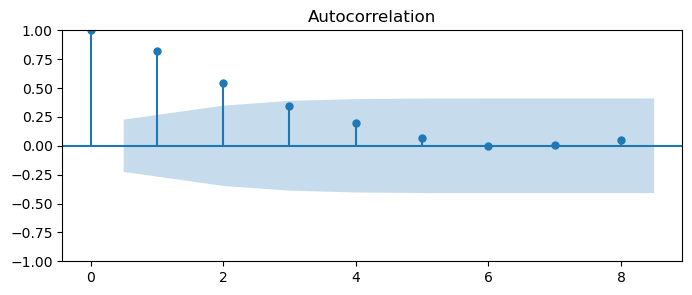

In [87]:
fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(recent_log_diff, ax=ax, lags=8);

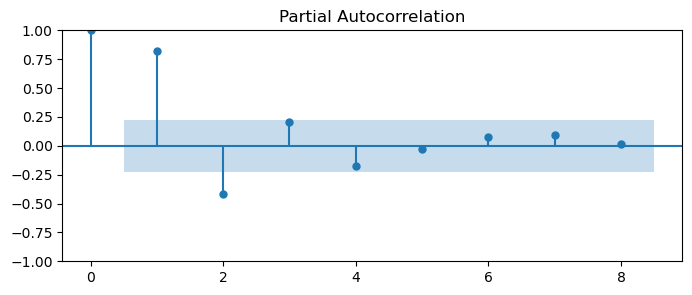

In [86]:
fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(recent_log_diff, ax=ax, lags=8, method="ywm");

# Modeling

In [88]:
mod1_arma = ARIMA(recent_log_diff, order=(1, 0, 0))
res1_arma = mod1_arma.fit()

# Print out summary information on the fit
print(res1_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   75
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 302.507
Date:                Thu, 19 Oct 2023   AIC                           -599.013
Time:                        16:34:36   BIC                           -592.061
Sample:                    02-01-2012   HQIC                          -596.237
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0148      0.003      4.650      0.000       0.009       0.021
ar.L1          0.8338      0.071     11.827      0.000       0.696       0.972
sigma2      1.806e-05    2.6e-06      6.941      0.0

C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [89]:
mod0_arma = ARIMA(recent_log_diff, order=(0, 0, 1))
res0_arma = mod0_arma.fit()

# Print out summary information on the fit
print(res0_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   75
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 295.638
Date:                Thu, 19 Oct 2023   AIC                           -585.276
Time:                        16:34:44   BIC                           -578.324
Sample:                    02-01-2012   HQIC                          -582.500
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0147      0.001     13.427      0.000       0.013       0.017
ma.L1          0.8727      0.072     12.163      0.000       0.732       1.013
sigma2       2.16e-05   3.79e-06      5.693      0.0

C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [90]:
mod2_arma = ARIMA(recent_log_diff, order=(1, 0, 1))
res2_arma = mod2_arma.fit()

# Print out summary information on the fit
print(res2_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   75
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 315.752
Date:                Thu, 19 Oct 2023   AIC                           -623.503
Time:                        16:34:49   BIC                           -614.233
Sample:                    02-01-2012   HQIC                          -619.802
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0144      0.003      5.344      0.000       0.009       0.020
ar.L1          0.7033      0.119      5.917      0.000       0.470       0.936
ma.L1          0.6586      0.124      5.298      0.0

C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [91]:
mod3_arma = ARIMA(recent_log_diff, order=(2, 0, 1))
res3_arma = mod3_arma.fit()

# Print out summary information on the fit
print(res3_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   75
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 317.250
Date:                Thu, 19 Oct 2023   AIC                           -624.500
Time:                        16:34:58   BIC                           -612.912
Sample:                    02-01-2012   HQIC                          -619.873
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0143      0.002      7.118      0.000       0.010       0.018
ar.L1          0.8924      0.168      5.299      0.000       0.562       1.222
ar.L2         -0.2697      0.128     -2.102      0.0

C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [92]:
mod4_arma = ARIMA(recent_log_diff, order=(2, 0, 2))
res4_arma = mod4_arma.fit()

# Print out summary information on the fit
print(res4_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   75
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 322.811
Date:                Thu, 19 Oct 2023   AIC                           -633.623
Time:                        16:35:07   BIC                           -619.718
Sample:                    02-01-2012   HQIC                          -628.071
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0141      0.002      6.862      0.000       0.010       0.018
ar.L1          0.4490      0.145      3.106      0.002       0.166       0.732
ar.L2         -0.1347      0.166     -0.812      0.4

C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Forecasting

In [ ]:
forecast = full_output.get_forecast(36)
future_prediction = forecast.conf_int()
future_prediction['value'] = forecast.predicted_mean
future_prediction.columns = ['lower','upper','prediction'] 
future_prediction

In [ ]:
p_list = [0,1,2,3]
d_list = [1]
q_list = [0,1,2,3]

arima_order_rmse_values = [] # list of tuples, where each tuple is an arima order
for column in list(chicago_df_defl_train_fd.columns):
    print(column) 
    order_value = md.evaluate_models(chicago_df_defl_train_fd[column], test=chicago_df_defl_test_fd[column],
                    p_values= p_list, d_values=d_list, q_values=q_list)
    arima_order_rmse_values.append(order_value)

In [ ]:
for i in range(len(chicago_df_defl_train_fd.columns)):
    md.predict_arima_model(chicago_df_defl_train_fd, chicago_df_defl_train_fd.columns[i],
                        arima_order=arima_order_rmse_values[i], periods=12)

In [ ]:
pred = output.get_prediction(start=pd.to_datetime('2016-05'), end=pd.to_datetime('2018-04'), dynamic=False)
pred_conf = pred.conf_int()
pred_conf


# Evaluation

# Conclusions

# Next Steps and Limitations

# For More Information

See the full analysis in the [Jupyter Notebook](https://github.com/lalynjay/weather_classification/blob/main/weather_classification.ipynb) or review [this presentation](https://github.com/lalynjay/weather_classification/blob/main/weather_classification.pdf)

For additional info, contact Lynn Anderson at lalynjay@gmail.com

Repository Structure

├── data 

├── images

├── README.md

├── ts_presentation.pdf

└── notebook.ipynb